# Table of Contents <a id='back'></a>

* [1.Iniciação, carregamento, otimização e exploração de dados](#inicio)
* [2.Análise de Dados](#analise)
    * [2.1. Da média de valores e desvio padrão](#padrao)
    * [2.2. Histograma da distribuições de características](#histograma)
    * [2.3. Da matriz de correlação](#correlacao)
* [3. Construindo um modelo para predizer a rotatividade de clientes](#construindo)
    * [3.1. Método regressão logística](#regressao)
    * [3.2. Método floresta aleatória](#floresta)
    * [3.3. Qual modelo rendeu melhores resultados?](#melhores)
* [4. Crie agrupamentos de clientes](#agrupamento)
    * [4.1. Padronizando os dados](#padronizando)
    * [4.2. Da matriz das distâncias]((#distancia)
    * [4.3. Treinando o modelo de agrupamento com o algoritmo K-means](#means)
    * [4.4. Da taxa de rotatividade para cada agrupamento](#taxa)
* [5. Conclusão](#conclusao)

# Estratégia de Retenção de Clientes

Este estudo tem como escopo ajudar a rede de academias Model Fitness no desenvolvimento de uma estratégia de retenção de clientes.

Quando se trata de academias e outros serviços, normalmente a rotatividade de clientes é um dos problemas mais comuns. Analisando o setor de academias, podemos identificar a rotatividade quando pessoas renovam ou não os seus contratos, o que pode acontecer sem ser notado, bem como podemos prevê-la conforme a frequência com que os serviços do estabelecimento são utilizados.

Tendo em vista que a academia Model Fitness pretende focar não necessariamente na rotatividade, mas sim na retenção de clientes, e analisando o conjunto de dados com uma parte dos perfis dos clientes, iremos apresentar uma estratégia de retenção de clientes.

Assim sendo, no presente estudo iremos:

- Predizer a probabilidade de rotatividade (para o mês seguinte) para cada cliente;
- Elaborar retratos de usuários típicos: selecionando os grupos mais marcantes e descrevendo suas principais características;
- Analisar os fatores que mais impactam a rotatividade;
- Desenvolver recomendações sobre como melhorar o serviço de clientes.

## 1. Iniciação, carregamento, otimização e exploração de dados <a id='inicio'></a>

Carregaremos as bibliotecas e os dados. Verificaremos se há valores ausentes ou/e duplicados. 

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import silhouette_score

In [11]:
path = 'C://Users//tha_s//Downloads//'

gym = pd.read_csv(path + 'gym_churn_us.csv')

In [12]:
gym.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [13]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [14]:
if gym.duplicated().any():
    print("Existem dados duplicados no dataframe.")
else:
    print("Não há dados duplicados no dataframe.")

Não há dados duplicados no dataframe.


In [15]:
if gym.isnull().values.any():
    print("Existem valores ausentes no dataframe.")
else:
    print("Não há valores ausentes no dataframe.")

Não há valores ausentes no dataframe.


Com o conjunto de dados carregados verificamos que a grafia e o tipo de dados estavam de acordo, bem como não haviam valores duplicados e nem ausentes. 

[Voltar ao Indice](#back)

## 2. Análise de Dados <a id='analise'></a>

Com os dados carregados e tratados passaremos agora a análise dos dados.

[Voltar ao Indice](#back)

### 2.1. Da média de valores e desvio padrão <a id='padrao'></a>

Observando o conjunto de dados, estudaremos a média de valores e o desvio padrão usando o método describe. Também, utilizando a coluna Churn, iremos separar o conjunto de dados em dois grupos: os que ficaram e os que não ficaram, para verificar a média dos valores médios nas características.

In [16]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Analisando a média de valores e desvio padrão na tabela acima, podemos observar o seguinte:
- a distribuição de gênero entre os clientes encontra-se quase equilibrada
- a maioria dos clientes está localizada perto da academia
- aproximadamente metade dos usuários são funcionários de uma companhia parceira
- uma porcentagem menor de clientes veio por meio de indicação de amigos
- a maioria forneceu seu número de telefone
- a média do tempo de contrato encontra-se nos 4 a 5 meses
- um pouco menos da metade participa de aulas em grupo
- a idade média dos clientes da academia é aproximadamente de 29 anos
- os clientes gastam em média cerca de quase $147 em despesas adicionais
- em média, os clientes têm cerca de 4 meses até o término do contrato
- a permanência média na academia é de cerca de 3.7 meses
- a frequência média de participação nas aulas é de cerca de 1.88 vezes por semana
- a frequência total no mês atual é de aproximadamente 1.77 vezes por semana
- a taxa de rotatividade média é de cerca de 27%

In [17]:
grupos = gym.groupby('Churn').mean()
grupos

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Na coluna Churn temos dois valores e definimos como: 
- 0: indica que o cliente não saiu da academia durante o mês em questão.
- 1: indica que o cliente saiu durante o mês em questão, ou seja, cancelou sua matricula da academia.

Assim, com os valores definidos e analisando a tabela acima, poderemos afirmar que algumas características do cliente podem determinar a sua continuidade no negócio, como por exemplo, nota-se que a maioria que está em uma localização próxima tende a permanecer.

Apesar da tabela acima mostrar as diferenças, iremos criar histogramas para uma melhor análise.

[Voltar ao Indice](#back)

### 2.2. Histograma da distribuições de características <a id='histograma'></a>

Para uma melhor analise faremos histograma de barra da distribuições de características para aqueles que saíram (rotatividade) e aqueles que ficaram.

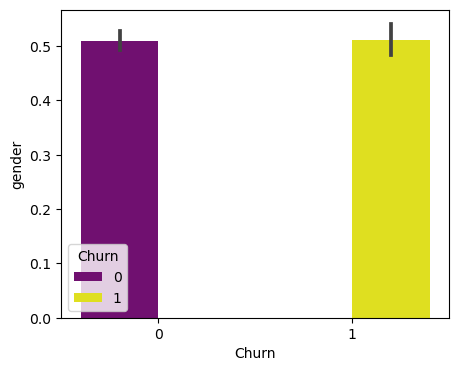

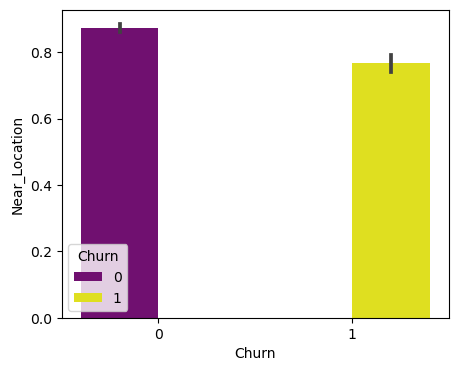

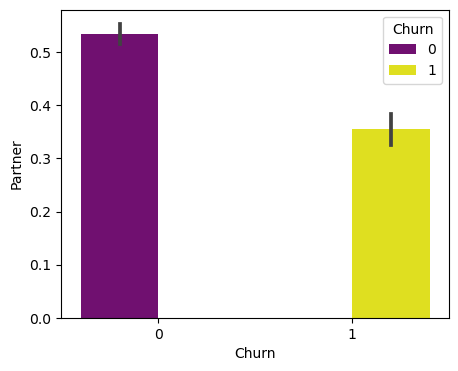

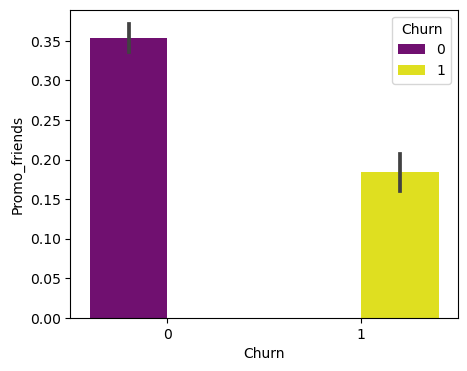

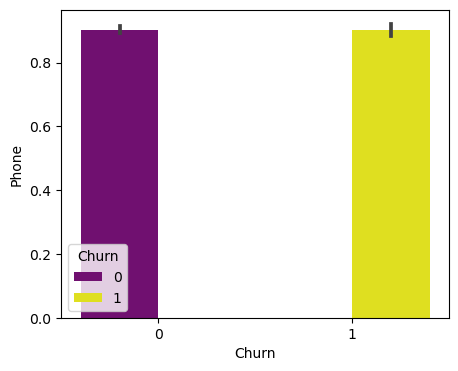

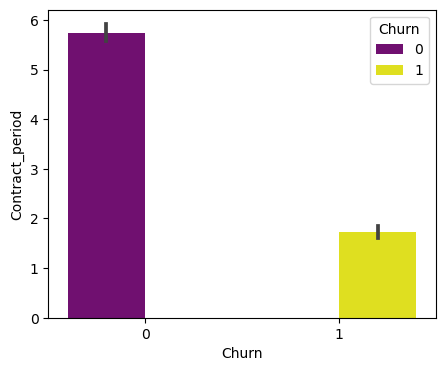

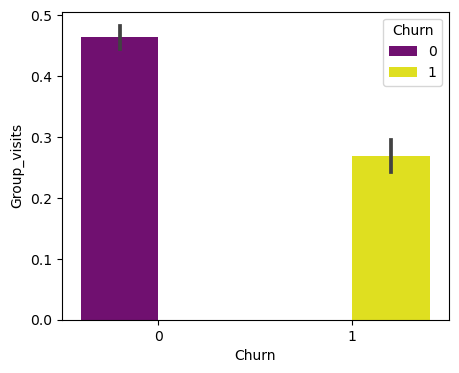

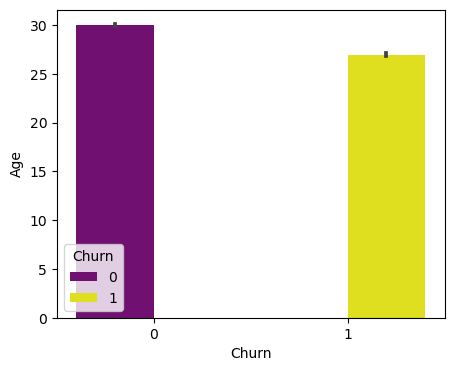

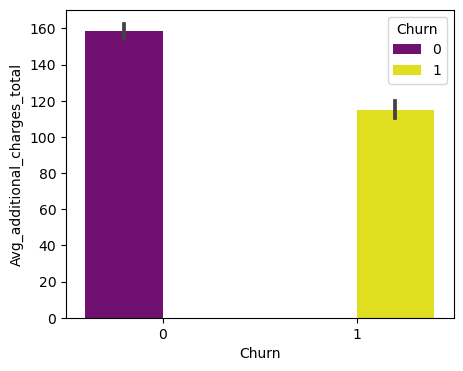

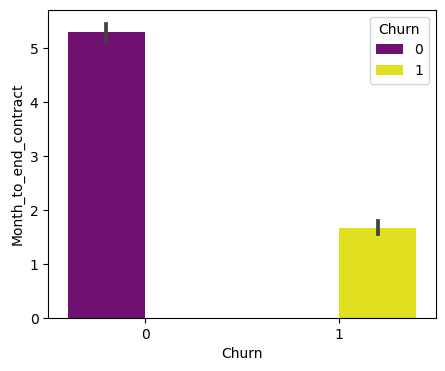

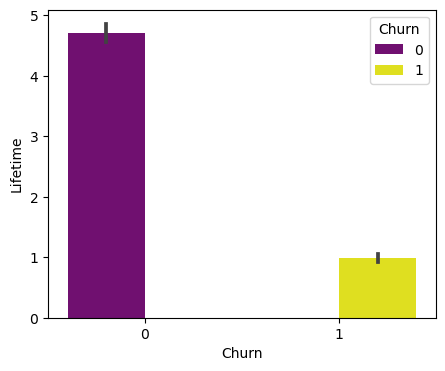

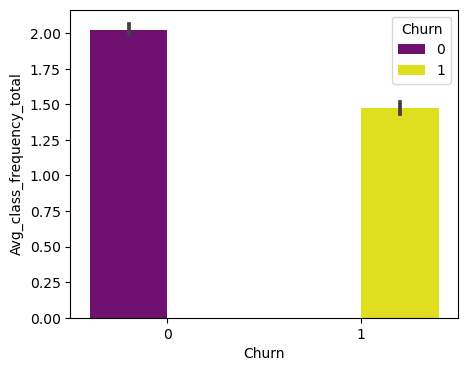

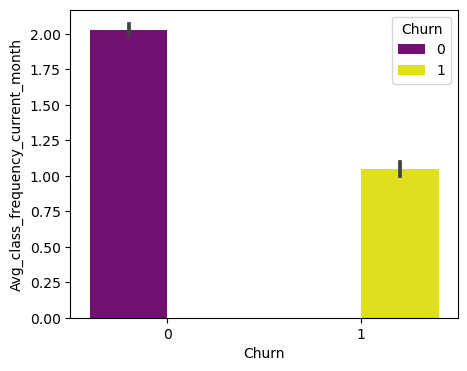

In [18]:
for col in gym.drop('Churn', axis=1).columns:
    plt.figure(figsize=(5, 4))
    sns.barplot(x=gym['Churn'], y=gym[col], hue='Churn', data=gym, palette=['purple','yellow'])
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

Com os histogramas criados e analisando cada característica e rotatividade do mês em questão, pudemos concluir que:

- Quanto ao gênero, não há diferença, não sendo uma característica determinante para permanência ou não do cliente.

- Quanto à localização próxima, não há diferença significativa e então podemos entender ou não se essa seria uma característica que merecesse maior atenção.

- Quanto ao cliente ser um funcionário de uma companhia parceira, nota-se que há uma diferença razoável e poderíamos entender que essa característica pode afetar a permanência do usuário.

- Quanto ao cliente que originalmente se inscreveu através de uma Promo_friends, há uma diferença razoável e pode-se dizer que essa característica afeta a continuidade do cliente na academia.

- Quanto ao número de telefone, evidentemente não há diferença e trata-se de uma característica que não determina a permanência de um usuário.

- Quanto ao período de contrato, nota-se uma grande diferença e com certeza trata-se de uma característica determinante para a continuidade do usuário no negócio.

- Quanto a visitas em grupo, há uma diferença razoável e pode-se dizer que essa característica afeta a continuidade do cliente na academia.

- Quanto à idade, não há diferença significativa e então podemos entender ou não se essa seria uma característica que merecesse maior atenção.

- Quanto à quantidade total de dinheiro gasto em outros serviços da academia, nota-se que há uma diferença razoável e poderíamos entender que essa característica pode afetar a permanência do usuário.

- Quanto aos meses remanescentes até que o contrato expire, há uma significativa diferença e deve ser uma característica a ser observada a fim de evitar a rotatividade dos clientes.

- Quanto ao tempo (em meses) desde a primeira vez que o cliente veio à academia, de fato, foi a característica que mais apresentou diferença, podendo ser a que mais demonstraria a rotatividade dos clientes.

- Quanto à frequência média de idas por semana por toda a vida do cliente, nota-se que há uma diferença razoável e poderíamos entender que essa característica pode afetar a permanência do usuário.

- Quanto à frequência média de visitas por semana durante o mês corrente, há uma diferença razoável e essa característica poderia afetar a continuidade do cliente na academia.

### 2.3. Da matriz de correlação <a id='correlacao'></a>

Iremos analisar a correlação e para isso iremos contruir uma matriz.

In [19]:
cm = gym.corr()
cm

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


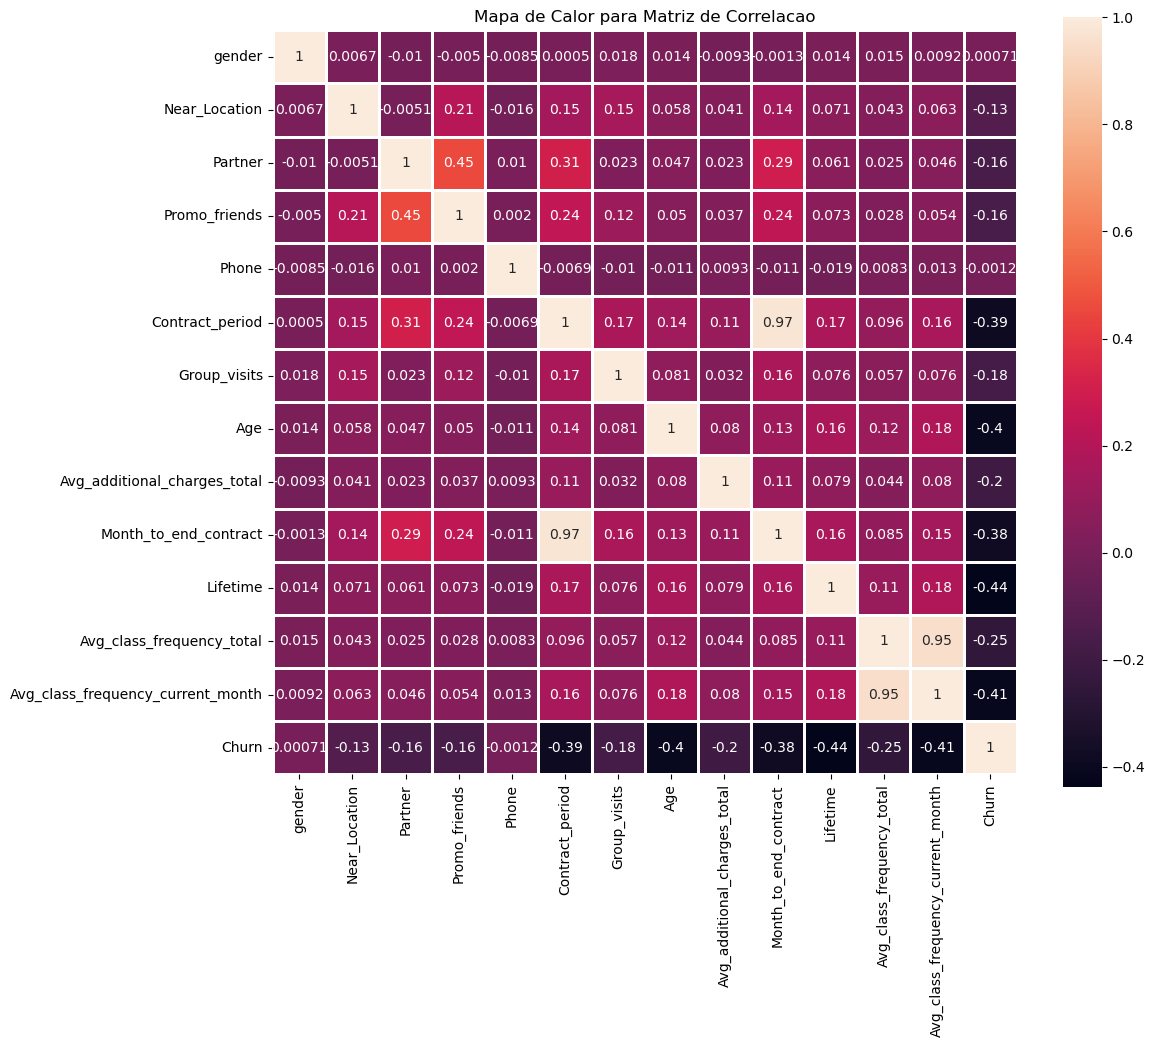

In [20]:
plt.figure(figsize=(12, 10)) 
sns.heatmap(cm, annot = True, linewidths=1, square=True)
plt.title('Mapa de Calor para Matriz de Correlacao')
plt.show()

Observando o heatmap da correlação, verificamos que a duração do contrato está fortemente correlacionada com o tempo restante do contrato.

Também foi possível verificar que há correlação negativa entre a taxa de rotatividade e diversas variáveis, como a duração do contrato, a participação em grupos e a taxa de frequência de aulas.

Assim sendo, entendemos que clientes com maior duração de contrato, participação em grupos e maior frequência de aulas têm uma menor taxa de rotatividade, sendo mais propensos a permanecer na academia.

[Voltar ao Indice](#back)

## 3. Construindo um modelo para predizer a rotatividade de clientes <a id='construindo'></a>

Nesse tópico, construiremos um modelo de classificação binária para clientes, onde a variável objetivo é a saída de usuários do próximo mês. Para isso, dividiremos os dados de treinamento e validação em dois conjuntos usando a função train_test_split().

Já com os dados de treinamento divididos, treinaremos o modelo no conjunto com os seguintes métodos: regressão logística e floresta aleatória.

Com os treinamentos realizados em ambos os métodos, iremos verificar qual modelo rendeu os melhores resultados.

In [21]:
X = gym.drop('Churn', axis=1)
y = gym['Churn']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

[Voltar ao Indice](#back)

### 3.1. Método regressão logística <a id='regressao'></a>

In [23]:
model = LogisticRegression(random_state=0)

In [24]:
model.fit(X_train, y_train)

C:\Users\tha_s\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [26]:
predictions = model.predict(X_test) 
probabilities = model.predict_proba(X_test)[:,1] 

In [27]:
print('Métricas da regressao logistica')
print('Acurácia: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precisão: {:.2f}'.format(precision_score(y_test, predictions)))
print('Sensibilidade: {:.2f}'.format(recall_score(y_test, predictions)))

Métricas da regressao logistica
Acurácia: 0.91
Precisão: 0.83
Sensibilidade: 0.80


[Voltar ao Indice](#back)

### 3.2. Método floresta aleatória <a id='floresta'></a>

In [28]:
tree_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [29]:
tree_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [30]:
tree_predictions = tree_model.predict(X_test)
tree_probabilities = tree_model.predict_proba(X_test)[:,1]

In [31]:
print('Métricas da árvore de decisão')
print('Acurácia: {:.2f}'.format(accuracy_score(y_test, tree_predictions)))
print('Precisão: {:.2f}'.format(precision_score(y_test, tree_predictions)))
print('Sensibilidade: {:.2f}'.format(recall_score(y_test, tree_predictions)))

Métricas da árvore de decisão
Acurácia: 0.92
Precisão: 0.84
Sensibilidade: 0.82


[Voltar ao Indice](#back)

### 3.3 Qual modelo rendeu melhores resultados? <a id='melhores'></a>

Utilizando os dados de validação para ambos os modelos utilizados anteriormente, avaliamos a acurácia, precisão e sensibilidade e agora estamos aptos a compará-los, bem como determinar qual modelo rendeu melhores resultados.

Verificamos que a acurácia, precisão e sensibilidade foram maiores no modelo floresta aleatória - 0.92, 0.84, 0.82, respectivamente.

Tendo como base apenas esses resultados, acreditamos que a árvore de decisão parece ter um desempenho um pouco melhor do que a regressão logística. No entanto, seria recomendado realizar uma análise mais aprofundada e também considerar outros fatores antes de tomar uma decisão final.

[Voltar ao Indice](#back)

## 4. Crie agrupamentos de clientes <a id='agrupamento'></a>

Seguindo nosso estudo, iremos definir colunas com dados sobre a rotatividade e também iremos identificar agrupamentos de clientes. Para isso, iremos seguir os seguintes passos:

- Padronizaremos os dados
- Construiremos uma matriz das distâncias
- Treinaremos o modelo de agrupamento
- Observaremos os valores médios das características para agrupamentos
- Faremos distribuições de características para os agrupamentos
- Calcularemos a taxa de rotatividade para cada agrupamento 

### 4.1. Padronizando os dados <a id='padronizando'></a>

Padrozinamos os dados para transformar os valores de forma que eles formem uma distribuição padrão normal: a média será 0, e o desvio padrão será 1. 

In [32]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [33]:
print(X_sc[:10]) 

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  0.28989014
   1.19403206 -0.0565538  -1.37753121  0.16160501 -0.19332863 -1.91191971
  -1.67847198]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.60882159
   1.19403206  0.55732732 -0.35021325  1.83194105  0.87368001  0.04517569
   0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.8092194
  -0.83749845 -0.36349436 -0.1815923  -0.79287273 -0.46008079 -0.02049263
  -0.02901851]
 [-1.0207145   0.42788074  1.02686062  1.49716101  0.32681319  1.60882159
   1.19403206  1.17120844 -0.87472237  1.83194105 -0.46008079  1.36465509
   1.51045005]
 [ 0.97970588  0.42788074  1.02686062  1.49716101  0.32681319 -0.8092194
  -0.83749845 -0.97737548  0.5336998  -0.79287273 -0.19332863 -0.78707638
  -0.61454183]
 [ 0.97970588  0.42788074 -0.973842   -0.66793083  0.32681319 -0.8092194
   1.19403206  1.478149    3.15330097 -0.79287273 -0.19332863  0.76580519
   0.82634551]
 [ 0.97970588  0.42788074

[Voltar ao Indice](#back)

### 4.2. Da matriz das distâncias <a id='distancia'></a>

Usando a função linkage, iremos construir a matriz das distâncias se baseando na matriz de características padronizada e, assim, construiremos um dendrograma. Com o gráfico criado, iremos estimar o número de agrupamentos que podemos destacar.

In [25]:
linked = linkage(X_sc, method = 'ward') 

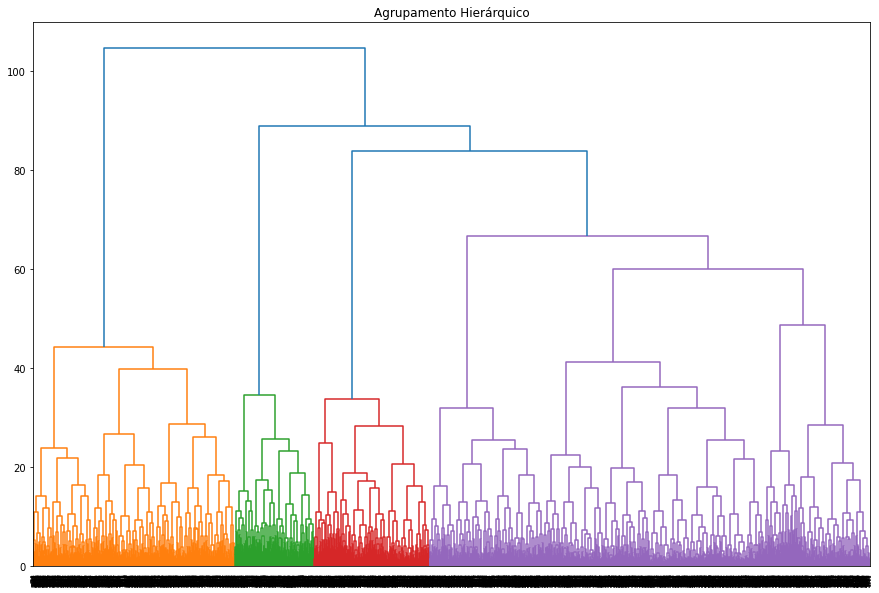

In [26]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupamento Hierárquico')
plt.show() 

Com o dendrograma construído, verificamos que o número ideal de agrupamentos sugerido corresponde a cinco, tendo em vista a existência de 5 cores diferentes no gráfico.

[Voltar ao Indice](#back)

### 4.3. Treinando o modelo de agrupamento com o algoritmo K-means <a id='means'></a>

Treinaremos o modelo de agrupamento com o algoritmo K-means e iremos prever agrupamentos de clientes, para tanto utilizaremos 5 como número de agrupamentos. Também iremos observar os valores médios das características para agrupamentos. 

In [34]:
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

In [35]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(X_sc)

In [36]:
gym['cluster_km'] = labels

In [37]:
gym.groupby(['cluster_km']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.503490,0.959123,0.782652,0.573280,1.000000,10.923230,0.546361,29.991027,160.881742,9.983051,4.748754,1.977676,1.970029,0.027916
1,0.559622,0.976387,0.360094,0.237308,0.998819,2.687131,0.469894,30.109799,161.594478,2.478158,4.890201,2.847678,2.846030,0.067296
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.484921,1.000000,0.350794,0.238095,1.000000,1.953968,0.341270,28.167460,131.516081,1.861905,2.431746,1.246646,1.011770,0.515079
4,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532


Analisando os clusters, verificamos que houve distribuição quase equilibrada em relação ao gênero, a maioria dos clientes estava localizada perto da academia e a maioria dos clientes forneceu seu número de telefone.

Porém, verificamos diferenças entre o cluster 0 e os demais - 1, 2, 3, 4. Verificamos as seguintes diferenças:

- Quanto à idade: no cluster 0, a idade média é de quase 30 anos, já nos demais, a idade média varia de cerca de 28 a 30 anos.
- Quanto aos contratos: O cluster 0 tem clientes com contratos mais longos - média de 11,8 meses, e já nos demais os contratos são mais curtos - média de 1,9 a 4,8 meses.
- Quanto à aula em grupo: no cluster 0, a maioria dos clientes participa, já nos demais a participação varia, sendo mais baixa no cluster 3.
- Quanto ao gasto nas despesas adicionais: no cluster 0, a maioria gasta mais com esse tipo de despesa, e já nos demais o gasto varia, sendo mais baixo no cluster 3.
- Quanto ao tempo até o término do contrato: no cluster 0, o tempo médio é 10,8 meses, e já nos demais varia em média de 1,8 a 10,8 meses.
- Quanto à duração média como membros da academia: no cluster 0, os clientes têm uma longa duração média como membros da academia, com cerca de 4,7 meses, e nos demais esse número varia, sendo mais baixo no cluster 3.
- Quanto à frequência média de participação nas aulas: o cluster 1 é o que tem a maior frequência, variando nos demais clusters. O cluster 0 tem a segunda maior frequência, sendo de aproximadamente 2 vezes por semana.

[Voltar ao Indice](#back)

### 4.4. Da distribuições de características para os agrupamentos <a id='distribuicao'></a>

Com valores médios das características para agrupamentos já encontrados, iremos fazer duas distribuições. Para isso, iremos escolher as características 'Contract_period' e 'Avg_class_frequency_current_month' para uma distribuição e 'Contract_period', 'Avg_class_frequency_total'.

C:\Users\tha_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


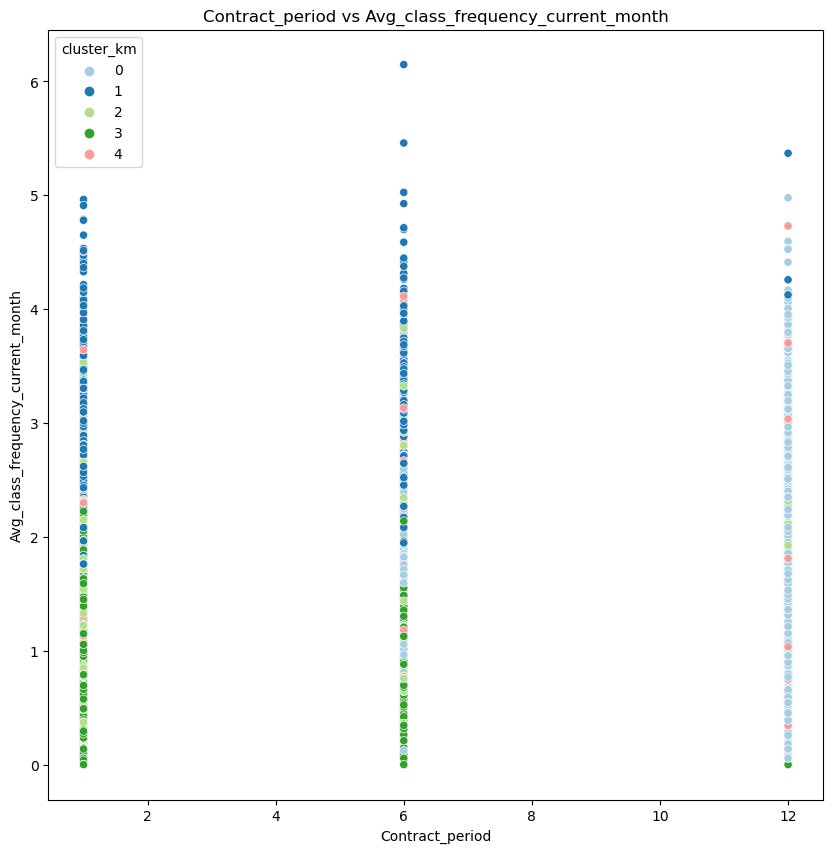

In [38]:
show_clusters_on_plot(gym, 'Contract_period', 'Avg_class_frequency_current_month', 'cluster_km')

Com relação à característica de frequência total no mês corrente, o grupo 0 está praticamente presente apenas nos contratos de 12 meses, já em contrapartida, os agrupamentos 1, 2 e 3 estão bem presentes nos contratos de 1 e 6 meses. Já o grupo 4, por ter uma existência menor, foi possível notar alguns pontos nos 3 tipos de contratos, parecendo ser semelhante à distribuição. 

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


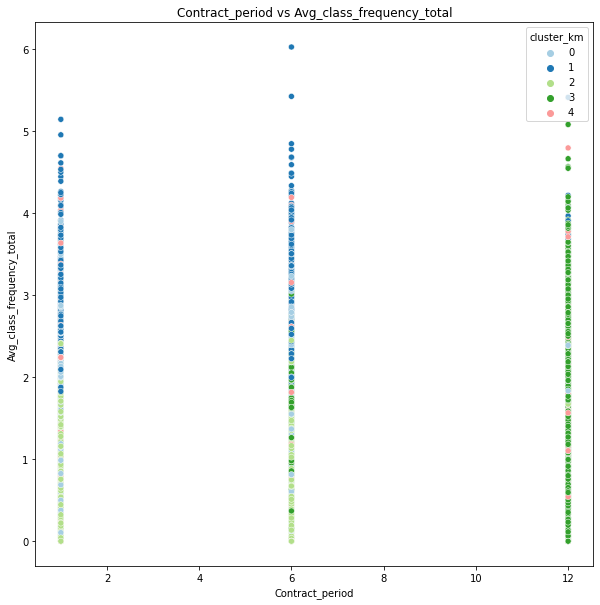

In [32]:
show_clusters_on_plot(gym, 'Contract_period', 'Avg_class_frequency_total', 'cluster_km')

Com relação à característica de frequência total, o grupo 0 está praticamente presente apenas nos contratos de 12 meses, já em contrapartida, os grupos 1, 2 e 3 estão bem presentes nos contratos de 1 e 6 meses. Já o grupo 4, por ter uma existência menor, foi possível notar alguns pontos nos 3 tipos de contratos, parecendo ser semelhante à distribuição.
Encontra-se semelhança com a distribuição anterior.

[Voltar ao Indice](#back)

### 4.5. Da taxa de rotatividade para cada agrupamento <a id='taxa'></a>

In [33]:
taxa = gym.groupby('cluster_km')['Churn'].mean() * 100
taxa

cluster_km
0    44.356436
1     7.218935
2    51.474104
3     2.675917
4    26.683938
Name: Churn, dtype: float64

Analisando a taxa de rotatividade dos clusters, podemos concluir que os agrupamentos 3 e 4 são os mais propensos a sair, enquanto os agrupamentos 0 e 1 são os mais propensos a continuarem como clientes na academia. Já o agrupamento 2 tem uma taxa intermediária, o que nos indica que há um nível moderado de propensão a deixar de frequentar a academia Model Fitness.

[Voltar ao Indice](#back)

## 5. Conclusão <a id='conclusao'></a>

Com esse estudo, podemos concluir que a distribuição de gênero - homem e mulher - encontrou-se equilibrada e que a maioria dos clientes está localizada perto da academia.

Com relação ao usuário que é funcionário de uma companhia parceira, corresponde a aproximadamente metade dos clientes, mas com relação às promoções de amigos, possui uma porcentagem menor. Também, concluímos que há um potencial de aumento na promoção de aulas em grupo, tendo em vista que um pouco menos da metade dos clientes participa de aulas em grupo e seria uma característica a ser utilizada. Observamos que a idade média dos clientes encontra-se em 29 anos, aproximadamente.

Podemos concluir também que há uma oportunidade de melhorar a retenção de clientes, tendo em vista que verificamos que os clientes permanecem na academia por cerca de 3,7 meses. Nesse sentido, vimos também na frequência média de participação nas aulas uma oportunidade para reter clientes, já que a frequência está em quase duas vezes por semana.

Por fim, quanto à taxa de rotatividade, observamos uma taxa média de aproximadamente 27%, ou seja, há a necessidade de melhorar a retenção de clientes e, assim, reduzir essa taxa.

**Recomendação**

Diante do que foi concluído, nossas recomendações são:

- Focar na retenção: para isso, pode-se oferecer benefícios exclusivos para os usuários, promoções especiais;

- Fortalecer a participação em aulas de grupo: aqui, poderiam promover novas aulas, aulas experimentais, aulas temáticas conforme a época do ano (Ex: Na época do carnaval, oferecer aula de bike com músicas de carnaval);

- Melhorar a experiência do cliente: sempre procurar os melhores instrutores, ter uma equipe treinada, ter um ambiente limpo e seguro e, por fim, sempre buscar melhorias no atendimento ao cliente;

- Análise contínua: encontrar um método para conseguir acompanhar a taxa de rotatividade, a participação dos alunos em aula e ter um sistema efetivo de feedbacks.

[Voltar ao Indice](#back)